In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt

In [3]:
#carregando dataset
df = pd.read_csv('dados/dataset.csv')

In [4]:
# Amostra dos dados
df.head()

,ID_Pedido,Data_Pedido,ID_Cliente,Segmento,Pais,Cidade,Estado,ID_Produto,Categoria,SubCategoria,Valor_Venda
0,CA-2017-152156,08/11/2017,CG-12520,Consumer,United States,Henderson,Kentucky,FUR-BO-10001798,Furniture,Bookcases,261.9600
1,CA-2017-152156,08/11/2017,CG-12520,Consumer,United States,Henderson,Kentucky,FUR-CH-10000454,Furniture,Chairs,731.9400
2,CA-2017-138688,12/06/2017,DV-13045,Corporate,United States,Los Angeles,California,OFF-LA-10000240,Office Supplies,Labels,14.6200
3,US-2016-108966,11/10/2016,SO-20335,Consumer,United States,Fort Lauderdale,Florida,FUR-TA-10000577,Furniture,Tables,957.5775
4,US-2016-108966,11/10/2016,SO-20335,Consumer,United States,Fort Lauderdale,Florida,OFF-ST-10000760,Office Supplies,Storage,22.3680


In [5]:
#checagem inicial do dataframe 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9700 entries, 0 to 9699
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   ID_Pedido     9700 non-null   object 
 1   Data_Pedido   9700 non-null   object 
 2   ID_Cliente    9700 non-null   object 
 3   Segmento      9700 non-null   object 
 4   Pais          9700 non-null   object 
 5   Cidade        9700 non-null   object 
 6   Estado        9700 non-null   object 
 7   ID_Produto    9700 non-null   object 
 8   Categoria     9700 non-null   object 
 9   SubCategoria  9700 non-null   object 
 10  Valor_Venda   9700 non-null   float64
dtypes: float64(1), object(10)
memory usage: 833.7+ KB


In [6]:
df[df.duplicated()]

,ID_Pedido,Data_Pedido,ID_Cliente,Segmento,Pais,Cidade,Estado,ID_Produto,Categoria,SubCategoria,Valor_Venda


In [7]:
## Agora podemos começar algumas perguntas
## Pergunta de Negócio 1:

### Qual Cidade com Maior Valor de Venda de Produtos da Categoria 'Office Supplies'?

In [8]:
#Filtro de Categoria
maior_valor_venda = df[df['Categoria'] == 'Office Supplies']

In [9]:
#agrupamento da info que quemos com groupby
cidade_vendas_max= maior_valor_venda.groupby(['Cidade','Categoria'])['Valor_Venda'].sum()

In [10]:
#usando o idmax para encontar a cidade com mais vendas e depois printando a infromação
maior_venda = cidade_vendas_max.idxmax()
print(f"Cidade com maior valor de venda para 'Office Supplies': {maior_venda}")

Cidade com maior valor de venda para 'Office Supplies': ('New York City', 'Office Supplies')


## Pergunta de Negócio 2:

### Qual o Total de Vendas Por Ano?

a partir daqui pra tornar tudo mais visivel vamos usar gráficos com matplotlib e seaborn

In [11]:
df.head()

,ID_Pedido,Data_Pedido,ID_Cliente,Segmento,Pais,Cidade,Estado,ID_Produto,Categoria,SubCategoria,Valor_Venda
0,CA-2017-152156,08/11/2017,CG-12520,Consumer,United States,Henderson,Kentucky,FUR-BO-10001798,Furniture,Bookcases,261.9600
1,CA-2017-152156,08/11/2017,CG-12520,Consumer,United States,Henderson,Kentucky,FUR-CH-10000454,Furniture,Chairs,731.9400
2,CA-2017-138688,12/06/2017,DV-13045,Corporate,United States,Los Angeles,California,OFF-LA-10000240,Office Supplies,Labels,14.6200
3,US-2016-108966,11/10/2016,SO-20335,Consumer,United States,Fort Lauderdale,Florida,FUR-TA-10000577,Furniture,Tables,957.5775
4,US-2016-108966,11/10/2016,SO-20335,Consumer,United States,Fort Lauderdale,Florida,OFF-ST-10000760,Office Supplies,Storage,22.3680


In [12]:
#para responder essa vou utilizar o datetime para extrair o ano da coluna Data_Pedido e criar a cluna ano
df['Data_Pedido'] = pd.to_datetime(df['Data_Pedido'], dayfirst=True)

In [13]:
#verificando se o type foi modificado
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9700 entries, 0 to 9699
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   ID_Pedido     9700 non-null   object        
 1   Data_Pedido   9700 non-null   datetime64[ns]
 2   ID_Cliente    9700 non-null   object        
 3   Segmento      9700 non-null   object        
 4   Pais          9700 non-null   object        
 5   Cidade        9700 non-null   object        
 6   Estado        9700 non-null   object        
 7   ID_Produto    9700 non-null   object        
 8   Categoria     9700 non-null   object        
 9   SubCategoria  9700 non-null   object        
 10  Valor_Venda   9700 non-null   float64       
dtypes: datetime64[ns](1), float64(1), object(9)
memory usage: 833.7+ KB


In [14]:
#agora é so criar a tabela ano
df['Ano'] = df['Data_Pedido'].dt.year

In [15]:
#verificando se a coluna foi criada
df.head()

,ID_Pedido,Data_Pedido,ID_Cliente,Segmento,Pais,Cidade,Estado,ID_Produto,Categoria,SubCategoria,Valor_Venda,Ano
0,CA-2017-152156,2017-11-08,CG-12520,Consumer,United States,Henderson,Kentucky,FUR-BO-10001798,Furniture,Bookcases,261.9600,2017
1,CA-2017-152156,2017-11-08,CG-12520,Consumer,United States,Henderson,Kentucky,FUR-CH-10000454,Furniture,Chairs,731.9400,2017
2,CA-2017-138688,2017-06-12,DV-13045,Corporate,United States,Los Angeles,California,OFF-LA-10000240,Office Supplies,Labels,14.6200,2017
3,US-2016-108966,2016-10-11,SO-20335,Consumer,United States,Fort Lauderdale,Florida,FUR-TA-10000577,Furniture,Tables,957.5775,2016
4,US-2016-108966,2016-10-11,SO-20335,Consumer,United States,Fort Lauderdale,Florida,OFF-ST-10000760,Office Supplies,Storage,22.3680,2016


In [16]:
#com a coluna criada, agora é so agrupar
total_vendas_ano = df.groupby('Ano')['Valor_Venda'].sum().reset_index()

In [17]:
#amostra
total_vendas_ano.head()

,Ano,Valor_Venda
0,2015,470768.6001
1,2016,454072.5154
2,2017,595365.9240
3,2018,715350.9152


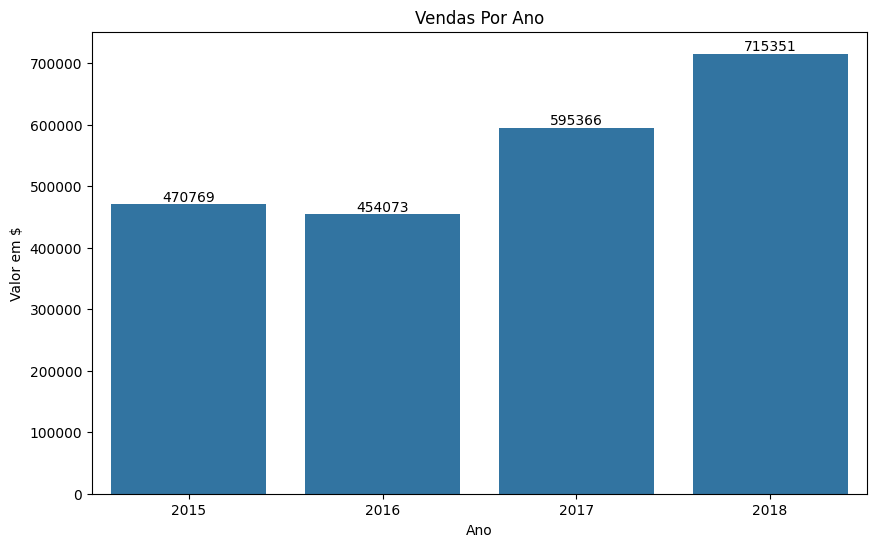

In [18]:
#agora vamos tornar isso visual, utilizando seaborn
fig, ax = plt.subplots(figsize =(10,6))
sns.barplot(data = total_vendas_ano, 
            y = 'Valor_Venda', 
            x = 'Ano',
            estimator="sum").set(title = 'Vendas Por Ano')
ax.bar_label(ax.containers[0], fontsize=10)
ax.set_ylabel('Valor em $')
plt.show()

## Pergunta de Negócio 3:

### Qual o Total de Vendas por Estado?


In [19]:
#amostra
df.head()

,ID_Pedido,Data_Pedido,ID_Cliente,Segmento,Pais,Cidade,Estado,ID_Produto,Categoria,SubCategoria,Valor_Venda,Ano
0,CA-2017-152156,2017-11-08,CG-12520,Consumer,United States,Henderson,Kentucky,FUR-BO-10001798,Furniture,Bookcases,261.9600,2017
1,CA-2017-152156,2017-11-08,CG-12520,Consumer,United States,Henderson,Kentucky,FUR-CH-10000454,Furniture,Chairs,731.9400,2017
2,CA-2017-138688,2017-06-12,DV-13045,Corporate,United States,Los Angeles,California,OFF-LA-10000240,Office Supplies,Labels,14.6200,2017
3,US-2016-108966,2016-10-11,SO-20335,Consumer,United States,Fort Lauderdale,Florida,FUR-TA-10000577,Furniture,Tables,957.5775,2016
4,US-2016-108966,2016-10-11,SO-20335,Consumer,United States,Fort Lauderdale,Florida,OFF-ST-10000760,Office Supplies,Storage,22.3680,2016


In [20]:
#novamente usar o groupby para agrupar
vendas_estado = df.groupby('Estado')['Valor_Venda'].sum().reset_index()

In [21]:
#amostra
vendas_estado.head()

,Estado,Valor_Venda
0,Alabama,19510.6400
1,Arizona,35272.6570
2,Arkansas,11673.8300
3,California,442927.0975
4,Colorado,31841.5980


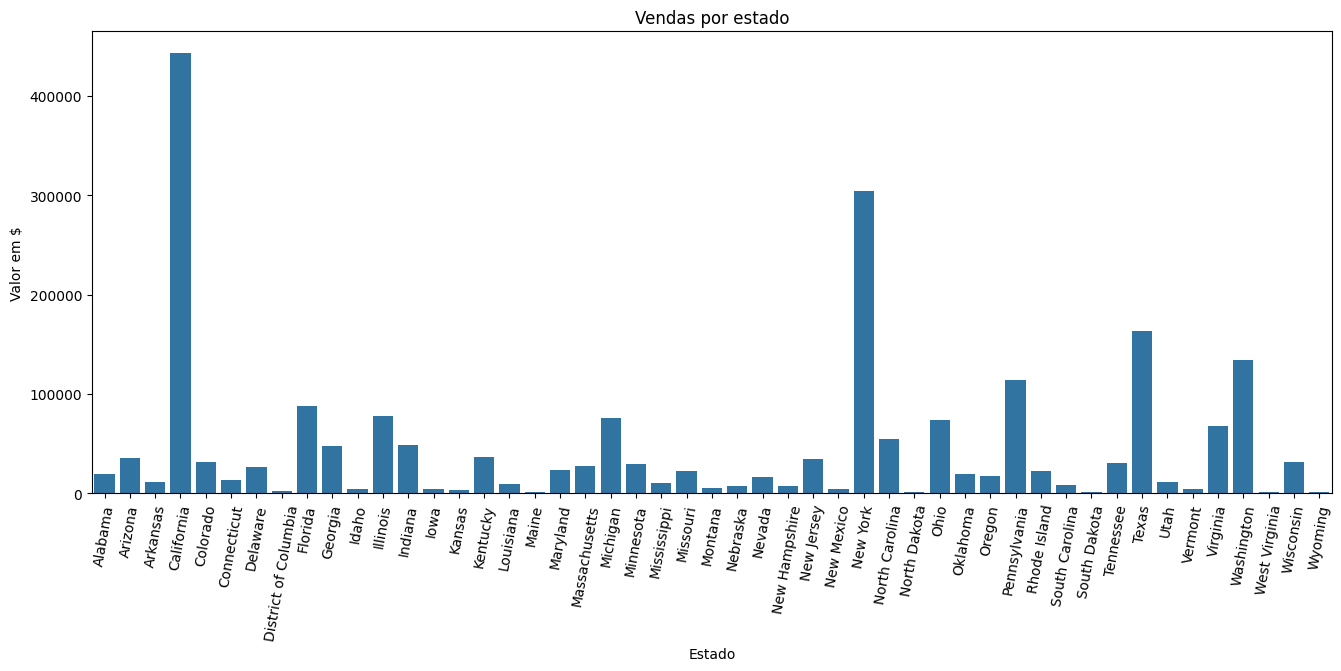

In [22]:
#reaproveitando o codigo do grafico passado
fig, ax = plt.subplots(figsize =(16,6))
sns.barplot(data = vendas_estado, 
            y = 'Valor_Venda', 
            x = 'Estado',
            estimator='sum'
            ).set(title = 'Vendas por estado')
plt.xticks(rotation = 80)
ax.set_ylabel('Valor em $')
plt.show()

## Pergunta de Negócio 4:

### Quais São as 10 Cidades com Maior Total de Vendas?


In [23]:
#mais uma vez o groupby
vendas_cidade = df.groupby('Cidade')['Valor_Venda'].sum().reset_index().sort_values(by='Valor_Venda',ascending=False).head(10)

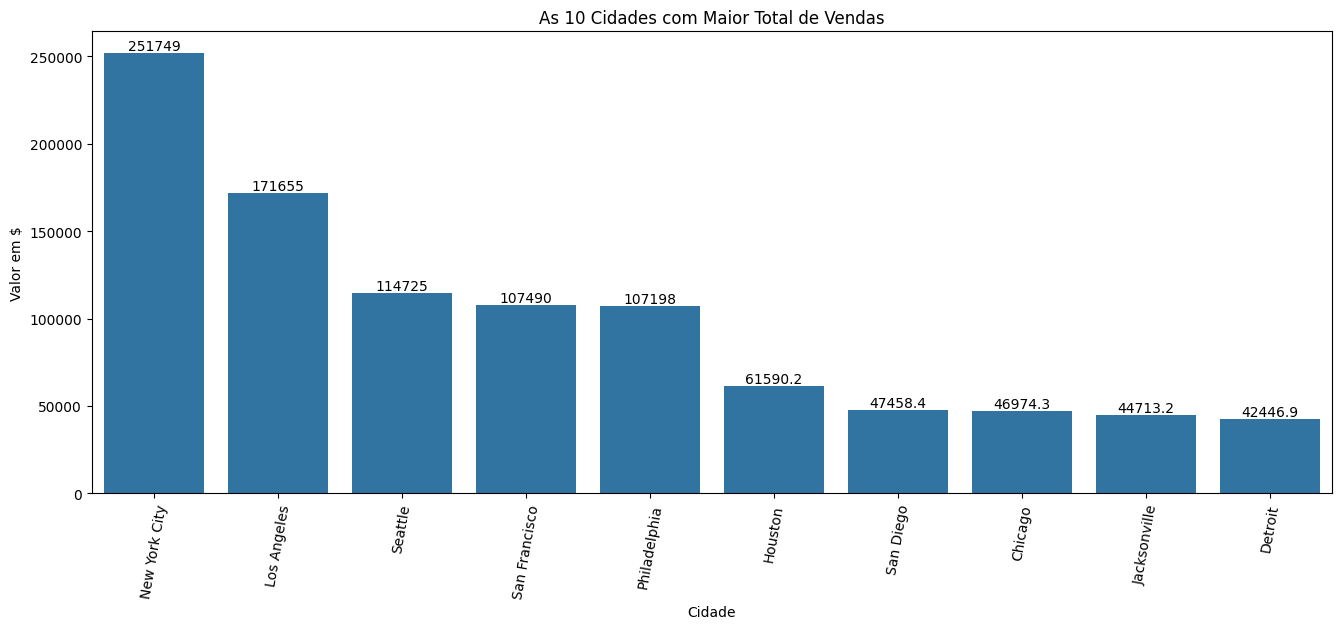

In [24]:
#reaproveitando o codigo do grafico passado
fig, ax = plt.subplots(figsize =(16,6))
sns.barplot(data = vendas_cidade, 
            y = 'Valor_Venda', 
            x = 'Cidade',
            estimator='sum').set(title = 'As 10 Cidades com Maior Total de Vendas')
ax.bar_label(ax.containers[0], fontsize=10)
plt.xticks(rotation = 80)
ax.set_ylabel('Valor em $')
plt.show()

## Pergunta de Negócio 5:

### Qual Segmento Teve o Maior Total de Vendas?

In [25]:
# Agrupamos por segmento e calculamos o total de vendas
maior_seg = df.groupby('Segmento')['Valor_Venda'].sum().reset_index().sort_values(by = 'Valor_Venda',
                                                                                      ascending = False)

In [26]:
#amostra
maior_seg

,Segmento,Valor_Venda
0,Consumer,1.133834e+06
1,Corporate,6.792322e+05
2,Home Office,4.224914e+05


In [27]:
#como o valor está em numeros cientificos, precisamos de um função para mudar esse comportamente
def autopct_format(values): 
    def my_format(pct): 
        total = sum(values) 
        val = int(round(pct * total / 100.0))
        return ' $ {v:d}'.format(v = val)
    return my_format

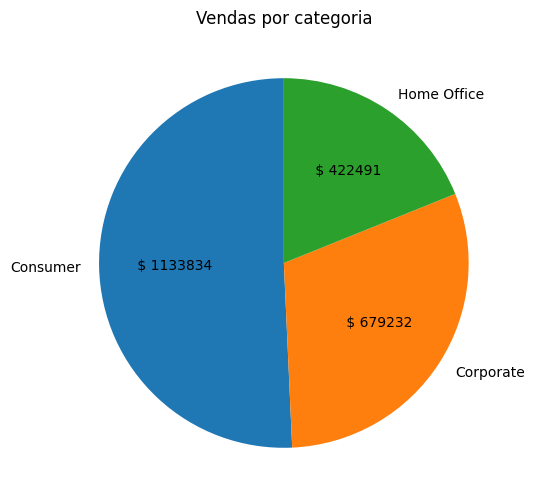

In [28]:
# faremos um grafico de pizza nesse já que são poucas categorias
plt.figure(figsize = (16, 6))

# Gráfico de pizza
plt.pie(maior_seg['Valor_Venda'], 
        labels = maior_seg['Segmento'],
        autopct = autopct_format(maior_seg['Valor_Venda']),
        startangle = 90)
plt.title('Vendas por categoria')

plt.show()

## Pergunta de Negócio 6 

### Qual o Total de Vendas Por Segmento e Por Ano?

In [29]:
#amostra
df.head()

,ID_Pedido,Data_Pedido,ID_Cliente,Segmento,Pais,Cidade,Estado,ID_Produto,Categoria,SubCategoria,Valor_Venda,Ano
0,CA-2017-152156,2017-11-08,CG-12520,Consumer,United States,Henderson,Kentucky,FUR-BO-10001798,Furniture,Bookcases,261.9600,2017
1,CA-2017-152156,2017-11-08,CG-12520,Consumer,United States,Henderson,Kentucky,FUR-CH-10000454,Furniture,Chairs,731.9400,2017
2,CA-2017-138688,2017-06-12,DV-13045,Corporate,United States,Los Angeles,California,OFF-LA-10000240,Office Supplies,Labels,14.6200,2017
3,US-2016-108966,2016-10-11,SO-20335,Consumer,United States,Fort Lauderdale,Florida,FUR-TA-10000577,Furniture,Tables,957.5775,2016
4,US-2016-108966,2016-10-11,SO-20335,Consumer,United States,Fort Lauderdale,Florida,OFF-ST-10000760,Office Supplies,Storage,22.3680,2016


In [30]:
venda_seg_ano = df.groupby(['Segmento','Ano'])['Valor_Venda'].sum().reset_index()

In [31]:
venda_seg_ano

,Segmento,Ano,Valor_Venda
0,Consumer,2015,256719.9166
1,Consumer,2016,265295.2593
2,Consumer,2017,288459.5572
3,Consumer,2018,323359.6019
4,Corporate,2015,125819.5957
5,Corporate,2016,114643.1229
6,Corporate,2017,203266.7398
7,Corporate,2018,235502.7284
8,Home Office,2015,88229.0878
9,Home Office,2016,74134.1332


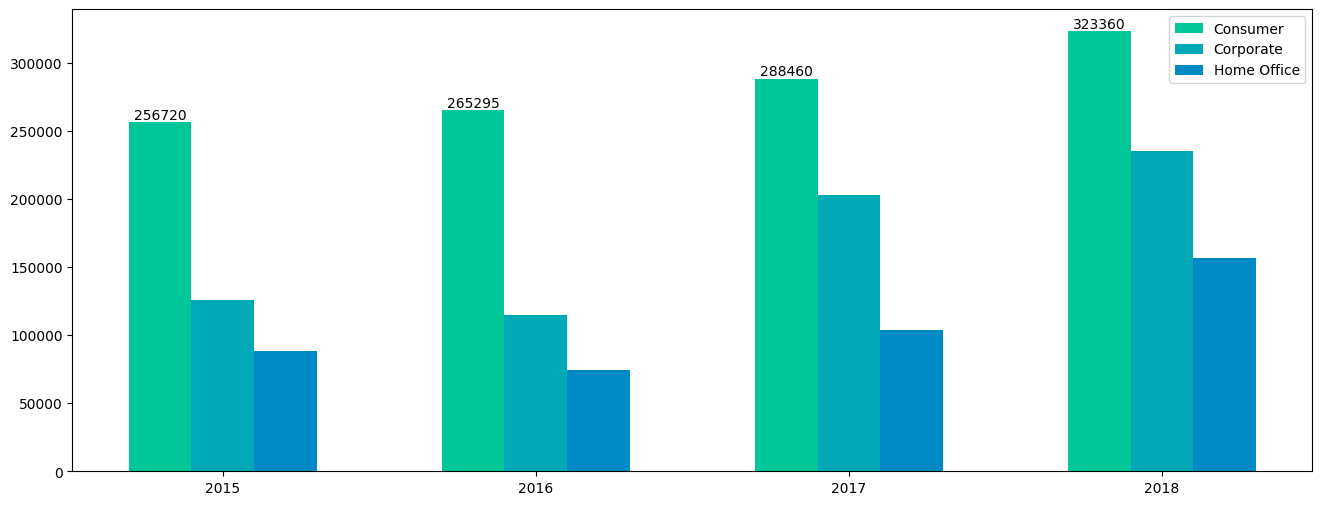

In [32]:
#aproveitando um gráfico de outro projeto que tenho no github para plotar o resultado dos 3 anos
#dando ênfase ao maior valor
fig,ax = plt.subplots(figsize=(16,6))

wid = 0.2

ax.bar(venda_seg_ano[venda_seg_ano['Segmento'] == 'Consumer'].Ano.values-wid,venda_seg_ano[venda_seg_ano['Segmento'] == 'Consumer'].Valor_Venda.values,
       color = '#00c698',label='Consumer',width=wid,)
ax.bar(venda_seg_ano[venda_seg_ano['Segmento'] == 'Corporate'].Ano.values,venda_seg_ano[venda_seg_ano['Segmento'] == 'Corporate'].Valor_Venda.values,
       color = '#00a9b5',label='Corporate',width=wid)
ax.bar(venda_seg_ano[venda_seg_ano['Segmento'] == 'Home Office'].Ano.values+wid,venda_seg_ano[venda_seg_ano['Segmento'] == 'Home Office'].Valor_Venda.values,
       color = '#008ac5',label='Home Office',width=wid)
ax.bar_label(ax.containers[0],fontsize=10)

ax.xaxis.set_ticks([2015,2016,2017,2018])

ax.legend()

plt.show()

## Pergunta de Negócio 7 
### Seguindo as condições abaixo, queremos analisar os valores de Vendas Receberiam 15% de Desconto?

- Se o Valor_Venda for maior que 1000 recebe 15% de desconto.
- Se o Valor_Venda for menor que 1000 recebe 10% de desconto.

In [33]:
#podemos contar os valores a partir do value counts,porem não temos a coluna ainda, por isso precisamos criar
#uma forma simples de aplicar essa condição é usando o np.where, que é um if e else basicamente

In [34]:
df["Desconto"] = np.where(df["Valor_Venda"] > 1000, 0.15, 0.10)

In [35]:
#verificando se a tabela foi criada
df.head()

,ID_Pedido,Data_Pedido,ID_Cliente,Segmento,Pais,Cidade,Estado,ID_Produto,Categoria,SubCategoria,Valor_Venda,Ano,Desconto
0,CA-2017-152156,2017-11-08,CG-12520,Consumer,United States,Henderson,Kentucky,FUR-BO-10001798,Furniture,Bookcases,261.9600,2017,0.1
1,CA-2017-152156,2017-11-08,CG-12520,Consumer,United States,Henderson,Kentucky,FUR-CH-10000454,Furniture,Chairs,731.9400,2017,0.1
2,CA-2017-138688,2017-06-12,DV-13045,Corporate,United States,Los Angeles,California,OFF-LA-10000240,Office Supplies,Labels,14.6200,2017,0.1
3,US-2016-108966,2016-10-11,SO-20335,Consumer,United States,Fort Lauderdale,Florida,FUR-TA-10000577,Furniture,Tables,957.5775,2016,0.1
4,US-2016-108966,2016-10-11,SO-20335,Consumer,United States,Fort Lauderdale,Florida,OFF-ST-10000760,Office Supplies,Storage,22.3680,2016,0.1


In [36]:
#agora podemos usar o loc para localizar no dataframe exatamente as linhas que cumprem o requisito
# e depois usar o len(), pra ter a resposta em forma de int
total = df.loc[df['Desconto'] == 0.15].__len__()
print(f'o total de vendas que receberia 15% de desconto é de {total}')

o total de vendas que receberia 15% de desconto é de 457


In [37]:
#amostra
df.head()

,ID_Pedido,Data_Pedido,ID_Cliente,Segmento,Pais,Cidade,Estado,ID_Produto,Categoria,SubCategoria,Valor_Venda,Ano,Desconto
0,CA-2017-152156,2017-11-08,CG-12520,Consumer,United States,Henderson,Kentucky,FUR-BO-10001798,Furniture,Bookcases,261.9600,2017,0.1
1,CA-2017-152156,2017-11-08,CG-12520,Consumer,United States,Henderson,Kentucky,FUR-CH-10000454,Furniture,Chairs,731.9400,2017,0.1
2,CA-2017-138688,2017-06-12,DV-13045,Corporate,United States,Los Angeles,California,OFF-LA-10000240,Office Supplies,Labels,14.6200,2017,0.1
3,US-2016-108966,2016-10-11,SO-20335,Consumer,United States,Fort Lauderdale,Florida,FUR-TA-10000577,Furniture,Tables,957.5775,2016,0.1
4,US-2016-108966,2016-10-11,SO-20335,Consumer,United States,Fort Lauderdale,Florida,OFF-ST-10000760,Office Supplies,Storage,22.3680,2016,0.1


In [38]:
#criando a tabela mÊs ja que não temos
df['Mes'] = df['Data_Pedido'].dt.month

In [39]:
#verificando se foi criada
df.head()

,ID_Pedido,Data_Pedido,ID_Cliente,Segmento,Pais,Cidade,Estado,ID_Produto,Categoria,SubCategoria,Valor_Venda,Ano,Desconto,Mes
0,CA-2017-152156,2017-11-08,CG-12520,Consumer,United States,Henderson,Kentucky,FUR-BO-10001798,Furniture,Bookcases,261.9600,2017,0.1,11
1,CA-2017-152156,2017-11-08,CG-12520,Consumer,United States,Henderson,Kentucky,FUR-CH-10000454,Furniture,Chairs,731.9400,2017,0.1,11
2,CA-2017-138688,2017-06-12,DV-13045,Corporate,United States,Los Angeles,California,OFF-LA-10000240,Office Supplies,Labels,14.6200,2017,0.1,6
3,US-2016-108966,2016-10-11,SO-20335,Consumer,United States,Fort Lauderdale,Florida,FUR-TA-10000577,Furniture,Tables,957.5775,2016,0.1,10
4,US-2016-108966,2016-10-11,SO-20335,Consumer,United States,Fort Lauderdale,Florida,OFF-ST-10000760,Office Supplies,Storage,22.3680,2016,0.1,10


In [40]:
#agora é só agupar com groupby e tirar sua média, aqui vou colocar a soma e mediana tambem  pra treinar a func agg
df_media = df.groupby(['Ano', 'Mes', 'Segmento'])['Valor_Venda'].agg(['sum','mean','median'])

In [41]:
df_media

sum        mean  median
Ano  Mes Segmento                                   
2015 1   Consumer      6896.6290  146.736787  36.440
         Corporate     1701.5280  130.886769  51.940
         Home Office   5607.5500  329.855882  62.820
     2   Consumer      3167.8540  117.327926  22.776
         Corporate      623.1180   69.235333  62.310
...                          ...         ...     ...
2018 11  Corporate    44357.9862  341.215278  79.530
         Home Office  24009.3840  247.519423  56.560
     12  Consumer     48107.4558  183.616244  52.533
         Corporate    20524.4320  153.167403  46.460
         Home Office  13022.3910  224.523983  49.260

[144 rows x 3 columns]

In [42]:
#adicionando um grafico de linhas a essa pergunta
# Vamos extrair os níveis
anos = df_media.index.get_level_values(0)
meses = df_media.index.get_level_values(1)
segmentos = df_media.index.get_level_values(2)

<Figure size 1200x600 with 0 Axes>

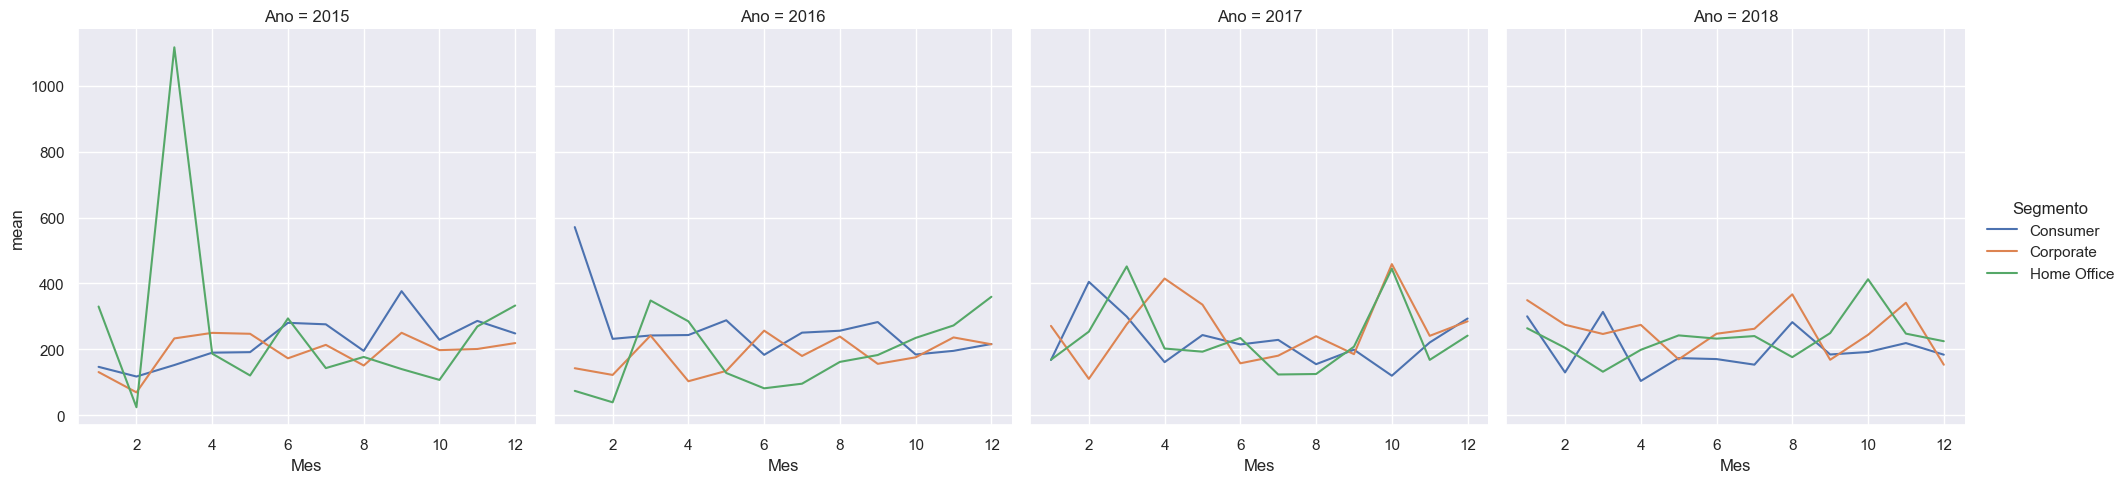

In [43]:
plt.figure(figsize = (12, 6))
sns.set_theme()
fig1 = sns.relplot(kind = 'line',
                   data = df_media, 
                   y = 'mean', 
                   x = meses,
                   hue = segmentos, 
                   col = anos,
                   col_wrap = 4)
plt.show()

## FIM POR ENQUANTO